# Time Series Overview plots

### Introduction to Time Series in Presentation
plot multiple variables together, showing overall dynamics, and showcase the wealth of data available

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
pd.__version__

'1.3.5'

In [3]:
CARIACO = xr.open_dataset("../annotatedDATA/CARIACO_merged_03.nc")

In [4]:
CARIACO

<xarray.Dataset>
Dimensions:                       (time: 298)
Coordinates:
  * time                          (time) datetime64[ns] 1995-11-01 ... 2020-0...
Data variables:
    time_month                    (time) object ...
    cdww                          (time) float64 ...
    iews                          (time) float64 ...
    inss                          (time) float64 ...
    mcc                           (time) float64 ...
    mwp                           (time) float64 ...
    si10                          (time) float64 ...
    sp                            (time) float64 ...
    sst                           (time) float64 ...
    t2m                           (time) float64 ...
    tauoc                         (time) float64 ...
    u10                           (time) float64 ...
    ust                           (time) float64 ...
    v10                           (time) float64 ...
    v10n                          (time) float64 ...
    vst                           (time) float64 ...
    wind                          (time) float64 ...
    cdir                          (time) float64 ...
    e                             (time) float64 ...
    ewss                          (time) float64 ...
    i10fg                         (time) float64 ...
    lsp                           (time) float64 ...
    magss                         (time) float64 ...
    mer                           (time) float64 ...
    metss                         (time) float64 ...
    mmtss                         (time) float64 ...
    mntss                         (time) float64 ...
    mtpr                          (time) float64 ...
    nsss                          (time) float64 ...
    sshf                          (time) int32 ...
    tp                            (time) float64 ...
    O2_ml_L                       (time) float64 ...
    O2_umol_kg                    (time) float64 ...
    NO3_UDO                       (time) float64 ...
    PO4_UDO                       (time) float64 ...
    SiO4_UDO                      (time) float64 ...
    NH4_USF                       (time) float64 ...
    NO2_USF                       (time) float64 ...
    NO3_NO2_USF                   (time) float64 ...
    PO4_USF                       (time) float64 ...
    SiO4_USF                      (time) float64 ...
    pH                            (time) float64 ...
    Alkalinity_mol_kg             (time) float64 ...
    Alkalinity_umol_kg            (time) float64 ...
    TCO2                          (time) float64 ...
    fCO2                          (time) float64 ...
    pH_corrected                  (time) float64 ...
    TCO2_corrected                (time) float64 ...
    fCO2_corrected                (time) float64 ...
    Salinity_bottles              (time) float64 ...
    Salinity_CTD                  (time) float64 ...
    Temperature                   (time) float64 ...
    Sigma_t                       (time) float64 ...
    TPP                           (time) float64 ...
    PIP                           (time) float64 ...
    POC_ug_kg                     (time) float64 ...
    PON_ug_kg                     (time) float64 ...
    POC_ug_L                      (time) float64 ...
    PN_ug_L                       (time) float64 ...
    C_N_particulate               (time) float64 ...
    DON                           (time) float64 ...
    DOP                           (time) float64 ...
    DOC                           (time) float64 ...
    TOC                           (time) float64 ...
    PrimaryProductivity           (time) float64 ...
    Chlorophyll                   (time) float64 ...
    Phaeopigments                 (time) float64 ...
    Total_Prokaryotes             (time) float64 ...
    Bact_Biomass_mgC_m3           (time) float64 ...
    Bact_Biomass_uMC              (time) float64 ...
    NO3_USF                       (time) float64 ...
    NO3_merged                    (time) float64 ...
    PO4_merged

## first plot
- Temperature
- pH
- NO3
- PO4
- SiO4

## second plot
- Chlorophyll
- NPP
- Phaeopigment
- Zooplankton (tot biomass)

## third plot (ERA5)
- Wind (-u)
- sst
- precipitation
- evaporation
- irradiance

## fourth plot (Satellite)
- MODIS
- SeaWiFS
- MERGED

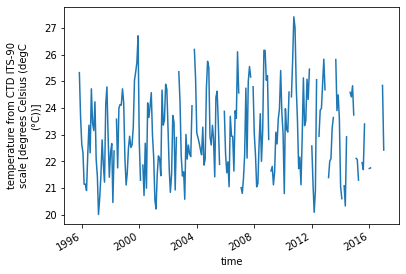

In [11]:
# PLOT 1

CARIACO.Temperature.plot()

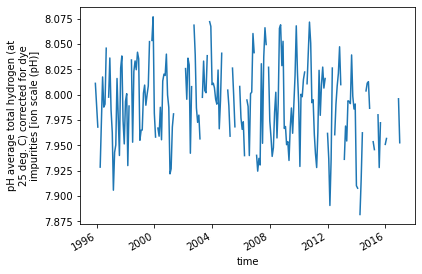

In [12]:

CARIACO.pH_corrected.plot()

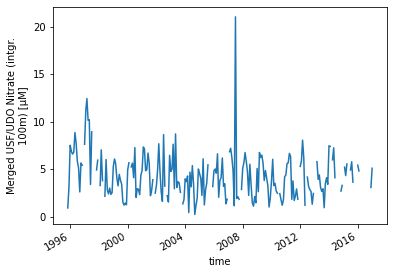

In [13]:

CARIACO.NO3_merged.plot()

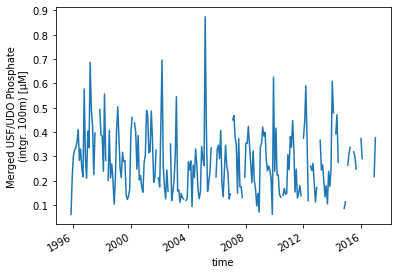

In [14]:

CARIACO.PO4_merged.plot()

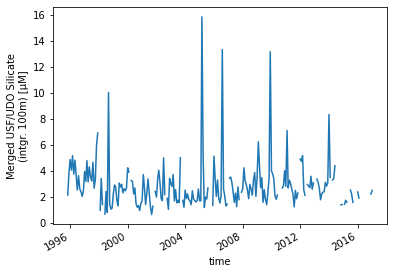

In [15]:

CARIACO.SiO4_merged.plot()